In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import scipy.io
mat = scipy.io.loadmat('/content/gdrive/My Drive/sat-4-full.mat')

In [0]:
import cv2
import imutils 
import numpy as np
import os
from sklearn.svm import LinearSVC
from sklearn.externals import joblib
from scipy.cluster.vq import *
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from glob import glob
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from helpers import *


In [0]:
train_x=mat['train_x']
train_y=mat['train_y']

a,b,c,d=train_x.shape
train_samples=d;
test_x=mat['test_x']
test_y=mat['test_y']
a,b,c,d=test_x.shape
test_samples=d;

labels=['barren land', 'trees', 'grassland','none'];
train_labels={}
label_count=0
for i in range(0,train_samples): 
  for j in range(0,4): 
    if(train_y[j,i]==1):      
      train_labels[str(label_count)] = labels[j]   
      label_count = label_count + 1

test_labels={}
label_count=0
for i in range(0,test_samples): 
  for j in range(0,4): 
    if(test_y[j,i]==1):      
      test_labels[str(label_count)] = labels[j]   
      label_count = label_count + 1
      


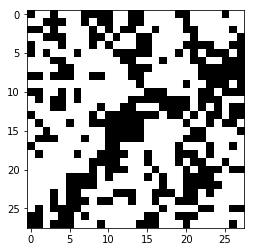

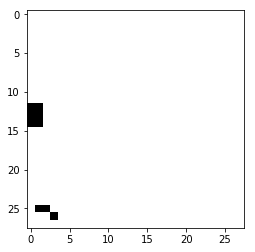

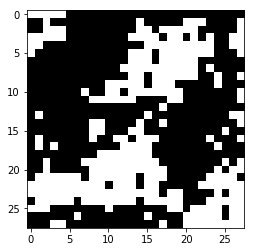

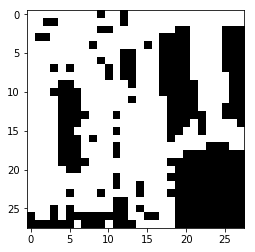

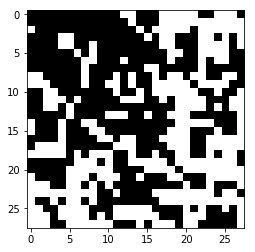

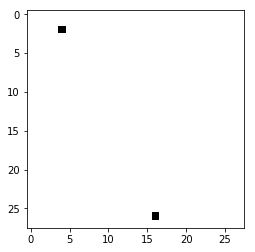

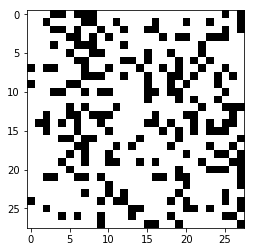

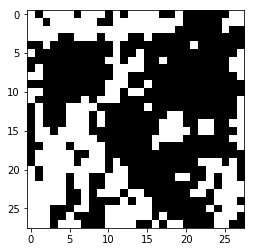

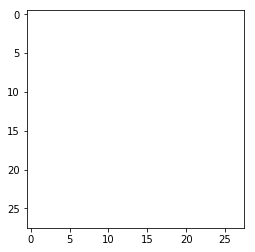

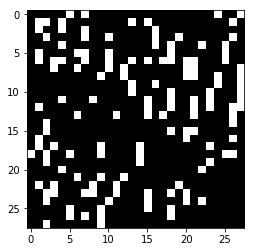

In [12]:
from google.colab.patches import cv2_imshow
img=train_x[:,:,0:3,1];
img.shape




for i in range(0,10):  
  img=train_x[:,:,0:3,i]
  grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  retval, threshold = cv2.threshold(grayscaled, 100, 255, cv2.THRESH_BINARY)
  orb = cv2.ORB_create() # Initiate SIFT detector
  # find the keypoints and descriptors with SIFT
  kp1, des1 = orb.detectAndCompute(threshold, None)
  # draw only keypoints location,not size and orientation
  img2 = cv2.drawKeypoints(threshold,kp1,outImage=img.copy())
  plt.imshow(img2),plt.show()
  

  

  
  


In [13]:
name_dict = {}
label_count = 0
descriptor_list = []
trainLabels = np.array([])
#sift_object = cv2.xfeatures2d.SIFT_create()
orb = cv2.ORB_create() # Initiate SIFT detector
labels=['barren land', 'trees', 'grassland','none'];

for i in range(0,10): 
  for j in range(0,4): 
    if(train_y[j,i]==1):
      word = labels[j]
      name_dict[str(label_count)] = word      
      trainLabels = np.append(trainLabels, label_count)
      img=train_x[:,:,0:3,i];
      grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      retval, threshold = cv2.threshold(grayscaled, 100, 255, cv2.THRESH_BINARY)
      kp1, des1 = orb.detectAndCompute(threshold, None)
    
      

'''
for word, imlist in trainImages.items():
    name_dict[str(label_count)] = word
    print("computing Features for ", word)
    for image in imlist:
        trainLabels = np.append(trainLabels, label_count)
        kp, des = sift_object.detectAndCompute(image, None)
        descriptor_list.append(des)
    label_count += 1
    
descriptor_vstack = np.array(descriptor_list[0])
for remaining in descriptor_list[1:]:
    descriptor_vstack = np.vstack((descriptor_vstack, remaining))
'''

'\nfor word, imlist in trainImages.items():\n    name_dict[str(label_count)] = word\n    print("computing Features for ", word)\n    for image in imlist:\n        trainLabels = np.append(trainLabels, label_count)\n        kp, des = sift_object.detectAndCompute(image, None)\n        descriptor_list.append(des)\n    label_count += 1\n    \ndescriptor_vstack = np.array(descriptor_list[0])\nfor remaining in descriptor_list[1:]:\n    descriptor_vstack = np.vstack((descriptor_vstack, remaining))\n'

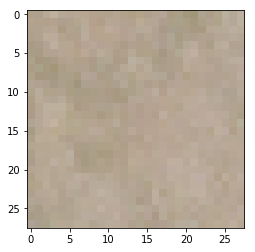

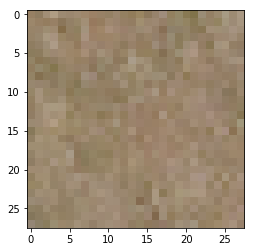

(<matplotlib.image.AxesImage at 0x7f2726eeeda0>, None)

In [39]:
i=5;
img = train_x[:,:,:,i];
plt.imshow(img),plt.show()
img = train_x[:,:,0:3,i];
#sift = cv2.xfeatures2d.SIFT_create()
orb=cv2.ORB_create()
kp = orb.detect(img,None)
img2 = cv2.drawKeypoints(img,kp,outImage=img2,color=(0,255,0))
plt.imshow(img2),plt.show()

In [11]:
from sklearn.decomposition import PCA

# Make an instance of the Model
#pca = PCA(n_components=4)
pca = PCA(n_components=2)
i=3
img = train_x[:,:,:,i];
#img = train_x;
img=img.reshape(-1,4).reshape(1,0,2)
#img=img.reshape(784,4,train_samples)
#pca.fit(img)
projected = pca.fit_transform(img,train_labels)
#projected = pca.fit(img)


ValueError: ignored

In [7]:
model = RandomForestClassifier()
fitted = model.fit(train_x,train_labels)
fitted.score(test_x,test_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: ignored